In [1]:
pip install python-dp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pydp as dp # by convention our package is to be imported as dp (dp for Differential Privacy!)
from pydp.algorithms.laplacian import BoundedSum, BoundedMean, Count, Max
import pandas as pd
import statistics 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
url1 = 'https://raw.githubusercontent.com/OpenMined/PyDP/dev/examples/Tutorial_4-Launch_demo/data/01.csv'
df1 = pd.read_csv(url1,sep=",", engine = "python")
df1.head()

,id,first_name,last_name,email,sales_amount,state
0,1,Osbourne,Gillions,ogillions0@feedburner.com,31.94,Florida
1,2,Glynn,Friett,gfriett1@blog.com,12.46,California
2,3,Jori,Blockley,jblockley2@unesco.org,191.14,Colorado
3,4,Garald,Dorian,gdorian3@webeden.co.uk,126.58,Texas
4,5,Mercy,Pilkington,mpilkington4@jugem.jp,68.32,Florida


In [ ]:
url2 = 'https://raw.githubusercontent.com/OpenMined/PyDP/dev/examples/Tutorial_4-Launch_demo/data/02.csv'
df2 = pd.read_csv(url2,sep=",", engine = "python")
df2.head()

,id,first_name,last_name,email,sales_amount,state
0,1,Wallie,Kaman,wkaman0@samsung.com,99.69,Idaho
1,2,Raynard,Tooby,rtooby1@indiegogo.com,208.61,Texas
2,3,Mandie,Stallibrass,mstallibrass2@princeton.edu,42.87,Michigan
3,4,Nonna,Regitz,nregitz3@icq.com,160.94,Iowa
4,5,Barthel,Cowgill,bcowgill4@tiny.cc,179.88,Ohio


In [ ]:
url3 ='https://raw.githubusercontent.com/OpenMined/PyDP/dev/examples/Tutorial_4-Launch_demo/data/03.csv'
df3 = pd.read_csv(url3,sep=",", engine = "python")
df3.head()

,id,first_name,last_name,email,sales_amount,state
0,1,Tomasina,Marcos,tmarcos0@wix.com,161.38,Indiana
1,2,Mill,Yitzhak,myitzhak1@barnesandnoble.com,182.22,Florida
2,3,Hobart,Banaszczyk,hbanaszczyk2@mac.com,41.67,Texas
3,4,Bonita,Benting,bbenting3@smugmug.com,190.26,Indiana
4,5,Kasper,Deyes,kdeyes4@storify.com,177.94,Ohio


In [ ]:
url4 = 'https://raw.githubusercontent.com/OpenMined/PyDP/dev/examples/Tutorial_4-Launch_demo/data/04.csv'
df4 = pd.read_csv(url4,sep=",", engine = "python")
df4.head()

,id,first_name,last_name,email,sales_amount,state
0,1,Dylan,Mattocks,dmattocks0@elegantthemes.com,141.90,Wisconsin
1,2,Tully,Pettko,tpettko1@engadget.com,15.09,Missouri
2,3,Ruy,Rodrigo,rrodrigo2@whitehouse.gov,90.72,Florida
3,4,Blakeley,Lower,blower3@macromedia.com,29.87,California
4,5,Horace,Studdert,hstuddert4@theatlantic.com,196.99,Ohio


In [ ]:
url5 = 'https://raw.githubusercontent.com/OpenMined/PyDP/dev/examples/Tutorial_4-Launch_demo/data/05.csv'
df5 = pd.read_csv(url5,sep=",", engine = "python")
df5.head()

,id,first_name,last_name,email,sales_amount,state
0,1,Susi,Barker,sbarker0@comsenz.com,220.50,Kentucky
1,2,Gan,Stork,gstork1@who.int,31.75,California
2,3,Corene,Izod,cizod2@wikia.com,163.53,California
3,4,Cornell,Schoales,cschoales3@freewebs.com,59.09,Minnesota
4,5,Petrina,Kennaird,pkennaird4@patch.com,186.38,Georgia


In [ ]:
combined_df_temp = [df1, df2, df3, df4, df5]
original_dataset = pd.concat(combined_df_temp)
print(original_dataset.shape)

(5000, 6)


In [ ]:
redact_dataset = original_dataset.copy()
redact_dataset = redact_dataset[1:]
original_dataset.head()
original_dataset.shape()

,id,first_name,last_name,email,sales_amount,state
0,1,Osbourne,Gillions,ogillions0@feedburner.com,31.94,Florida
1,2,Glynn,Friett,gfriett1@blog.com,12.46,California
2,3,Jori,Blockley,jblockley2@unesco.org,191.14,Colorado
3,4,Garald,Dorian,gdorian3@webeden.co.uk,126.58,Texas
4,5,Mercy,Pilkington,mpilkington4@jugem.jp,68.32,Florida


In [ ]:
redact_dataset.head()

,id,first_name,last_name,email,sales_amount,state
1,2,Glynn,Friett,gfriett1@blog.com,12.46,California
2,3,Jori,Blockley,jblockley2@unesco.org,191.14,Colorado
3,4,Garald,Dorian,gdorian3@webeden.co.uk,126.58,Texas
4,5,Mercy,Pilkington,mpilkington4@jugem.jp,68.32,Florida
5,6,Elle,McConachie,emcconachie5@census.gov,76.91,Texas


In [ ]:
sum_original_dataset = round(sum(original_dataset['sales_amount'].to_list()), 2)
sum_redact_dataset = round(sum(redact_dataset['sales_amount'].to_list()), 2)
sales_amount_Osbourne = round((sum_original_dataset - sum_redact_dataset), 2)
assert sales_amount_Osbourne == original_dataset.iloc[0, 4]

Local Differential Privacy


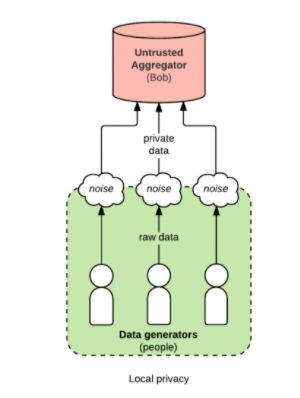


Global Differential Privacy


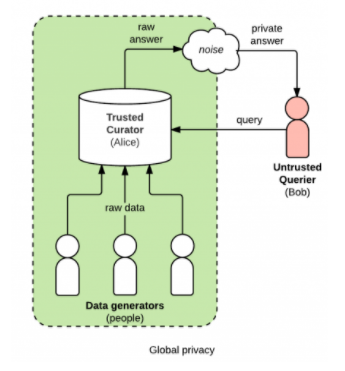

## BoundedSum 
Computes the sum of values in a dataset, in a differentially private manner.

In this case, Global DP is used as The datasets are merged into one.

In [ ]:
dp_sum_original_dataset = BoundedSum(epsilon= 1.5, lower_bound =  5, upper_bound = 250, dtype ='float') 
dp_sum_og = dp_sum_original_dataset.quick_result(original_dataset['sales_amount'].to_list())
dp_sum_og = round(dp_sum_og, 2)
print(dp_sum_og)

636589.05


In [ ]:
dp_redact_dataset = BoundedSum(epsilon= 1.5, lower_bound =  5, upper_bound = 250, dtype ='float')
dp_redact_dataset.add_entries(redact_dataset['sales_amount'].to_list())
dp_sum_redact=round(dp_redact_dataset.result(), 2)
print(dp_sum_redact)

636589.01


#Comparison
Between Sum of original data & redacted data and Sum of original data & redacted data calculated in a differentially private manner.

In [ ]:
print(f"Sum of sales_value in the orignal dataset: {sum_original_dataset}")
print(f"Sum of sales_value in the orignal dataset with DP: {dp_sum_og}")
assert dp_sum_og != sum_original_dataset

print(f"Sum of sales_value in the second dataset: {sum_redact_dataset}")
print(f"Sum of sales_value in the second dataset with DP: {dp_sum_redact}")
assert dp_sum_redact != sum_redact_dataset

print(f"Difference in Sum with DP: {round(dp_sum_og - dp_sum_redact, 2)}")
print(f"Actual Difference in Sum: {sales_amount_Osbourne}")
assert round(dp_sum_og - dp_sum_redact, 2) != sales_amount_Osbourne


Sum of sales_value in the orignal dataset: 636594.59
Sum of sales_value in the orignal dataset with DP: 636589.05
Sum of sales_value in the second dataset: 636562.65
Sum of sales_value in the second dataset with DP: 636589.01
Difference in Sum with DP: 0.04
Actual Difference in Sum: 31.94
